# **Download the Data set From Kaggle**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sathushanag","key":"24ed2c46bfc00c22f72898d93d683284"}'}

In [ ]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# **Load the Data set**

In [ ]:
!kaggle datasets download -d rishiksaisanthosh/brain-tumour-classification

Dataset URL: https://www.kaggle.com/datasets/rishiksaisanthosh/brain-tumour-classification
License(s): unknown


In [ ]:
import zipfile

with zipfile.ZipFile("brain-tumour-classification.zip", "r") as zip_ref:
    zip_ref.extractall("brain-tumour-classification")

In [ ]:
import os

dataset_path = "brain-tumour-classification/BrainTumor_1"
folders = os.listdir(dataset_path)
print("Folders in dataset:", folders)

Folders in dataset: ['Test', 'Train']


# **Data Preprocessing**

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
IMAGE_SIZE = 100
BATCH_SIZE = 16

In [ ]:
CHANNELS = 3
EPOCHS = 30

In [ ]:
train_datasets=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/brain-tumour-classification/BrainTumor_1/Train',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 22848 files belonging to 4 classes.


In [ ]:
test_datasets=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/brain-tumour-classification/BrainTumor_1/Test',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1311 files belonging to 4 classes.


## **Data Visualization**

In [ ]:
train_len = len(train_datasets)
test_len = len(test_datasets)

In [ ]:
print("Length of Train dataset:",train_len)
print("Length of Test dataset:",test_len)

Length of Train dataset: 1428
Length of Test dataset: 82


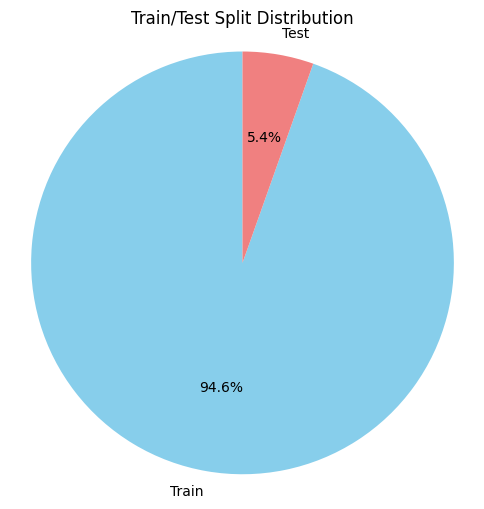

In [ ]:
# Pie chart
labels = ['Train', 'Test']
sizes = [train_len, test_len]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Train/Test Split Distribution')
plt.axis('equal')
plt.show()

## **Seeing the class distribution in the train dataset**

In [ ]:
class_names =train_datasets.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def show_class_distribution(dataset, title) -> None:
    class_names = dataset.class_names
    class_counts = [0] * len(class_names)

    for images, labels in dataset:
        labels = labels.numpy()
        for label in labels:
            class_counts[label] += 1


    plt.figure(figsize=(6, 6))
    plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
    plt.title(f'Class Distribution in {title}')
    plt.axis('equal')
    plt.show()


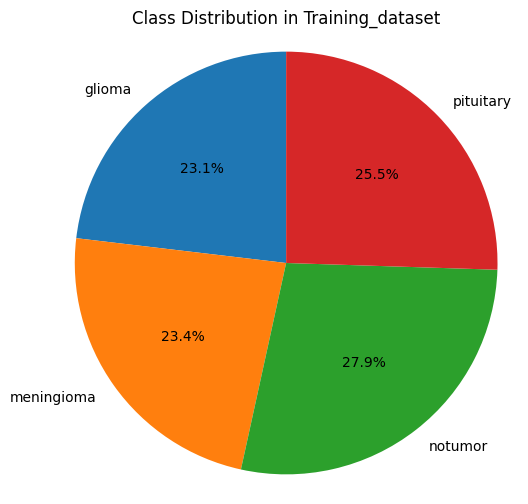

In [ ]:
show_class_distribution(train_datasets,'Training_dataset')

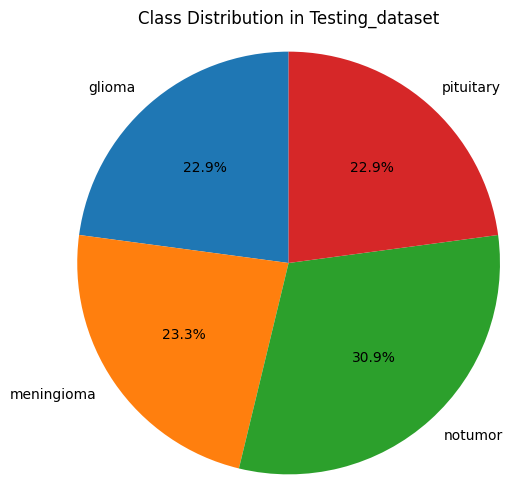

In [ ]:
show_class_distribution(test_datasets,'Testing_dataset')

### **Visualize the data set**

In [ ]:
for image_batch,label_batch in train_datasets.take(1):
  # print(image_batch[0].numpy())
  print(image_batch[0].shape)

(100, 100, 3)


In [ ]:
def show_brain_tumor_images(dataset):
  plt.figure(figsize=(12,12))
  for image_batch,label_batch in dataset.take(1):
    for i in range(12):
      ax = plt.subplot(4,3,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(dataset.class_names[label_batch[i]])
      plt.axis("off")

#### **Training data**

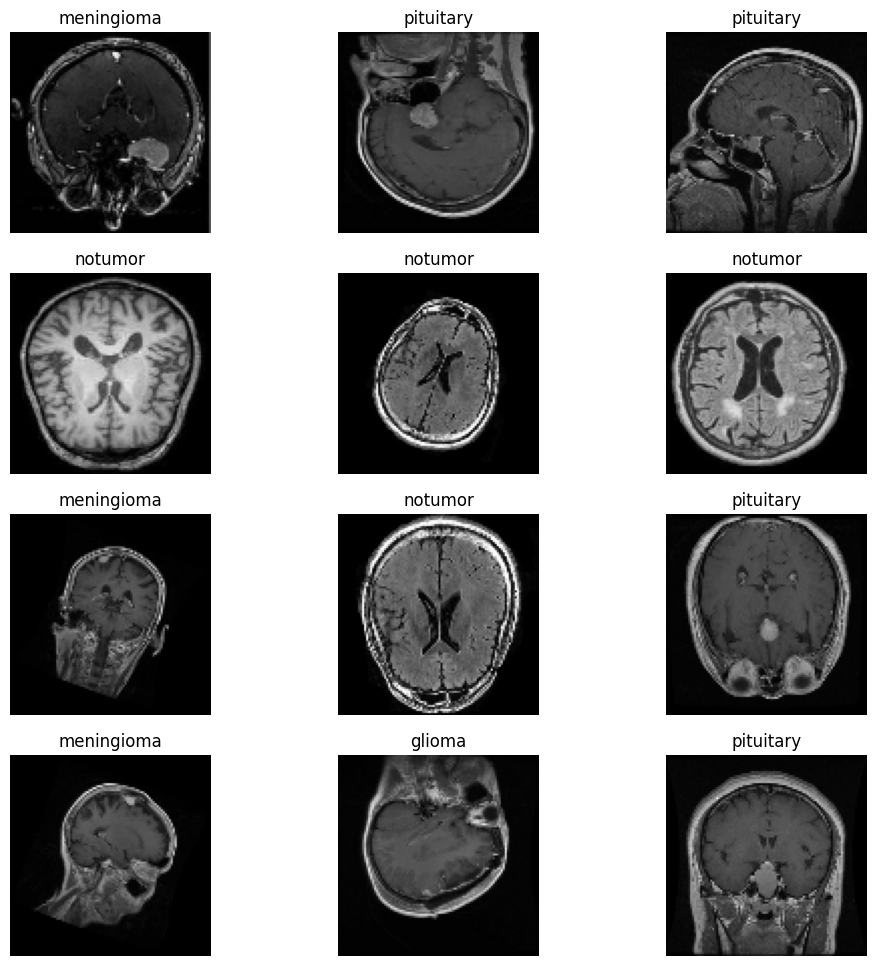

In [ ]:
show_brain_tumor_images(train_datasets)

#### **Testing data**

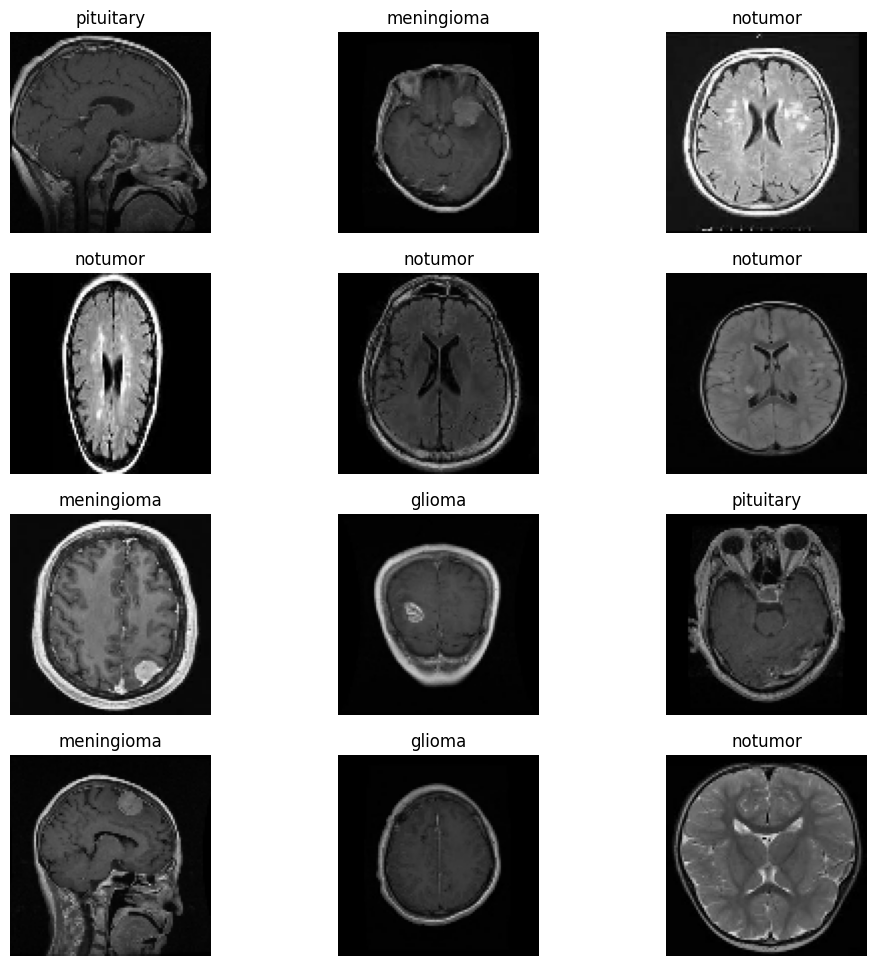

In [ ]:
show_brain_tumor_images(test_datasets)

In [ ]:
def get_dataset_partitions_tf(ds,val_split=0.5,shuffle=True,shuffle_size=1000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)


  val_size = int(ds_size*val_split)

  val_ds = ds.take(val_size)
  test_ds = ds.skip(val_size)

  return val_ds,test_ds

In [ ]:
val_ds,test_ds = get_dataset_partitions_tf(train_datasets)
train_ds=train_datasets

In [ ]:
len(test_ds),len(val_ds)

(714, 714)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255)
])

In [ ]:
data_augumentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1, 0.1,fill_mode='nearest'),
    layers.RandomZoom(0.4),
    layers.RandomFlip('horizontal'),
    layers.RandomContrast(0.1),
    # layers.RandomBrightness(factor=(0.01,0.1))
])

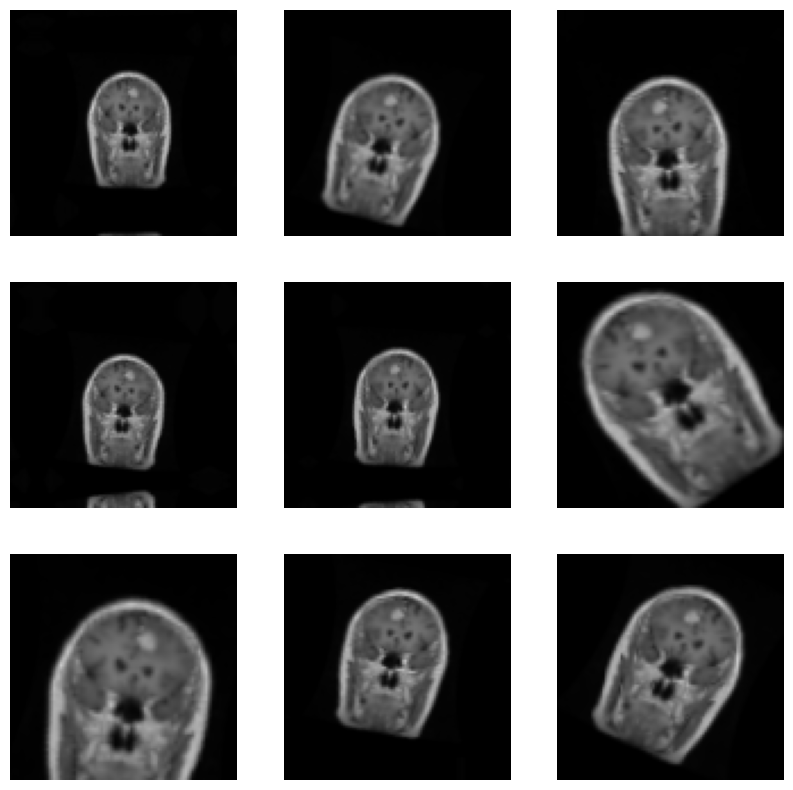

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augumentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
# from google.colab import files
# files.upload()

# **Develop the CNN Model**

## **Load the Develop the CNN Model**

## **CNN Model**

In [ ]:
cnn_model = tf.keras.models.load_model("/content/model_fine_cnn.h5",compile=True)

## **VGG16**

In [ ]:
vgg16_model = tf.keras.models.load_model("/content/model_vgg16.h5")

## **VGG 19**

In [ ]:
vgg19_model = tf.keras.models.load_model("/content/vgg19_model.h5")

## **RestNet101**

In [ ]:
restnet101_model = tf.keras.models.load_model("/content/restNet101_model.h5")

## **Mobile Net V2**

In [ ]:
mobilenetv2_model = tf.keras.models.load_model("/content/model_mobilenetv2.h5")

### **Inception V3**

In [ ]:
model_inceptionv3 = tf.keras.models.load_model("/content/model_inceptionv3.h5")

## **Efficient Net**

In [ ]:
efficientnetb7_model = tf.keras.models.load_model("/content/model_efficientnetb7.h5")

## **CNN_GRU**

In [ ]:
cnn_gru_model = tf.keras.models.load_model("/content/model_cnn_gru.h5",compile=True)

## **AlexNet**

In [111]:
model_alexnet = tf.keras.models.load_model("/content/model_alexnet.h5")

# **Evaluate the Model**

## **CNN Model**

In [ ]:
cnn_train_scores =cnn_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9020 - loss: 0.3185


In [ ]:
cnn_val_scores = cnn_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8984 - loss: 0.3345


In [ ]:
cnn_test_scores = cnn_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8948 - loss: 0.3260


In [ ]:
cnn_train_scores

[0.32129502296447754, 0.9003851413726807]

## **VGG 16**

In [ ]:
vgg16_train_scores = vgg16_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.6558 - loss: 0.9208


In [ ]:
vgg16_val_scores = vgg16_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6613 - loss: 0.9114


In [ ]:
vgg16_test_scores = vgg16_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6445 - loss: 0.9305


## **VGG 19**

In [ ]:
vgg19_train_scores = vgg19_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.7449 - loss: 0.7134


In [ ]:
vgg19_val_scores = vgg19_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.7348 - loss: 0.7294


In [ ]:
vgg19_test_scores = vgg19_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.7443 - loss: 0.7223


## **Rest Net101**

In [ ]:
restnet101_train_scores = restnet101_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.5629 - loss: 1.1200


In [ ]:
restnet101_val_scores = restnet101_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5586 - loss: 1.1137


In [ ]:
restnet101_test_scores = restnet101_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5603 - loss: 1.1318


## **Mobile Netv2 Model**

In [ ]:
mobilenetv2_train_scores = mobilenetv2_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7115 - loss: 0.8082


In [ ]:
mobilenetv2_val_scores = mobilenetv2_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7062 - loss: 0.8038


In [ ]:
mobilenetv2_test_scores = mobilenetv2_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7033 - loss: 0.8099


## **Inception V3**

In [ ]:
inceptionv3_train_scores = model_inceptionv3.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.7478 - loss: 0.6146


In [ ]:
inceptionv3_val_scores = model_inceptionv3.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7497 - loss: 0.6195


In [ ]:
inceptionv3_test_scores = model_inceptionv3.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7522 - loss: 0.6171


## **EfficientNetb7**

In [ ]:
efficientnet_train_scores = efficientnetb7_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 101s 70ms/step - accuracy: 0.2660 - loss: 1.3822


In [ ]:
efficientnet_val_scores = efficientnetb7_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.2705 - loss: 1.3812


In [ ]:
efficientnet_test_scores = efficientnetb7_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 49s 68ms/step - accuracy: 0.2749 - loss: 1.3814


## **CNN-GRU Model**

In [ ]:
cnn_gru_train_scores = cnn_gru_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3870 - loss: 1.8141


In [ ]:
cnn_gru_val_scores = cnn_gru_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3830 - loss: 1.8416


In [ ]:
cnn_gru_test_scores = cnn_gru_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3915 - loss: 1.8132


## **AlexNet**

In [112]:
alexnet_train_scores = model_alexnet.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8682 - loss: 0.3615


In [113]:
alexnet_val_scores = model_alexnet.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8632 - loss: 0.3790


In [114]:
alexnet_test_scores = model_alexnet.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8709 - loss: 0.3616


# **Analysis the Performance of the Model**

In [115]:
Custom_cnn = [cnn_train_scores[1],cnn_val_scores[1],cnn_test_scores[1]]
CNN_GRU = [cnn_gru_train_scores[1],cnn_gru_val_scores[1],cnn_gru_test_scores[1]]
Alexnet = [alexnet_train_scores[1],alexnet_val_scores[1],alexnet_test_scores[1]]
VGG_16 = [vgg16_train_scores[1],vgg16_val_scores[1],vgg16_test_scores[1]]
VGG_19 = [vgg19_train_scores[1],vgg19_val_scores[1],vgg19_test_scores[1]]
RestNet_101 = [restnet101_train_scores[1],restnet101_val_scores[1],restnet101_test_scores[1]]
mobilenetv2 = [mobilenetv2_train_scores[1],mobilenetv2_val_scores[1],mobilenetv2_test_scores[1]]
inceptionv3 = [inceptionv3_train_scores[1],inceptionv3_val_scores[1],inceptionv3_test_scores[1]]
Efficientnetb7 = [efficientnet_train_scores[1],efficientnet_val_scores[1],efficientnet_test_scores[1]]


In [116]:
Accuracy = ['Training Accuracy','Validation Accuracy','Test Accuracy']

In [117]:
import pandas as pd
performance = pd.DataFrame({'Accuracy_Scores':Accuracy,\
                            'Custom CNN':Custom_cnn,\
                            'CNN-GRU':CNN_GRU,\
                            'AlexNet':Alexnet,\
                            'VGG16':VGG_16,\
                            'VGG19':VGG_19,\
                           'RestNet101':RestNet_101,\
                            'Mobile Netv2':mobilenetv2,\
                            'InceptionV3': inceptionv3,\
                            'EfficientNetb7':Efficientnetb7})

In [118]:
performance

,Accuracy_Scores,Custom CNN,CNN-GRU,AlexNet,VGG16,VGG19,RestNet101,Mobile Netv2,InceptionV3,EfficientNetb7
0,Training Accuracy,0.900385,0.389443,0.869004,0.653361,0.737701,0.558430,0.707458,0.749519,0.270133
1,Validation Accuracy,0.899772,0.386555,0.867209,0.655900,0.733894,0.558211,0.710084,0.749475,0.269695
2,Test Accuracy,0.899160,0.388743,0.871148,0.650210,0.734681,0.559349,0.703256,0.746936,0.272847


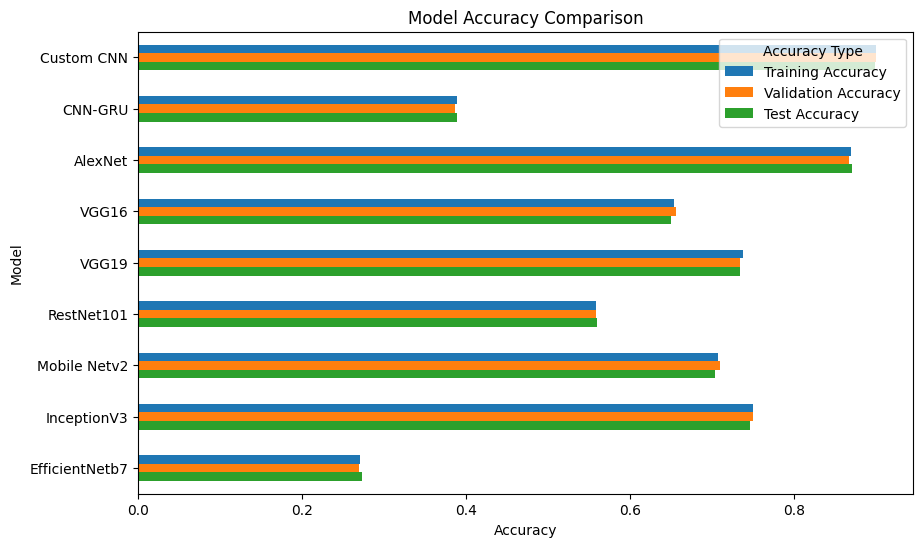

In [119]:
performance_transposed = performance.set_index('Accuracy_Scores').T

# Create the horizontal bar chart
performance_transposed.plot(kind='barh', figsize=(10, 6))
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.legend(title='Accuracy Type')
plt.gca().invert_yaxis()  # Invert y-axis to display in descending order
plt.show()


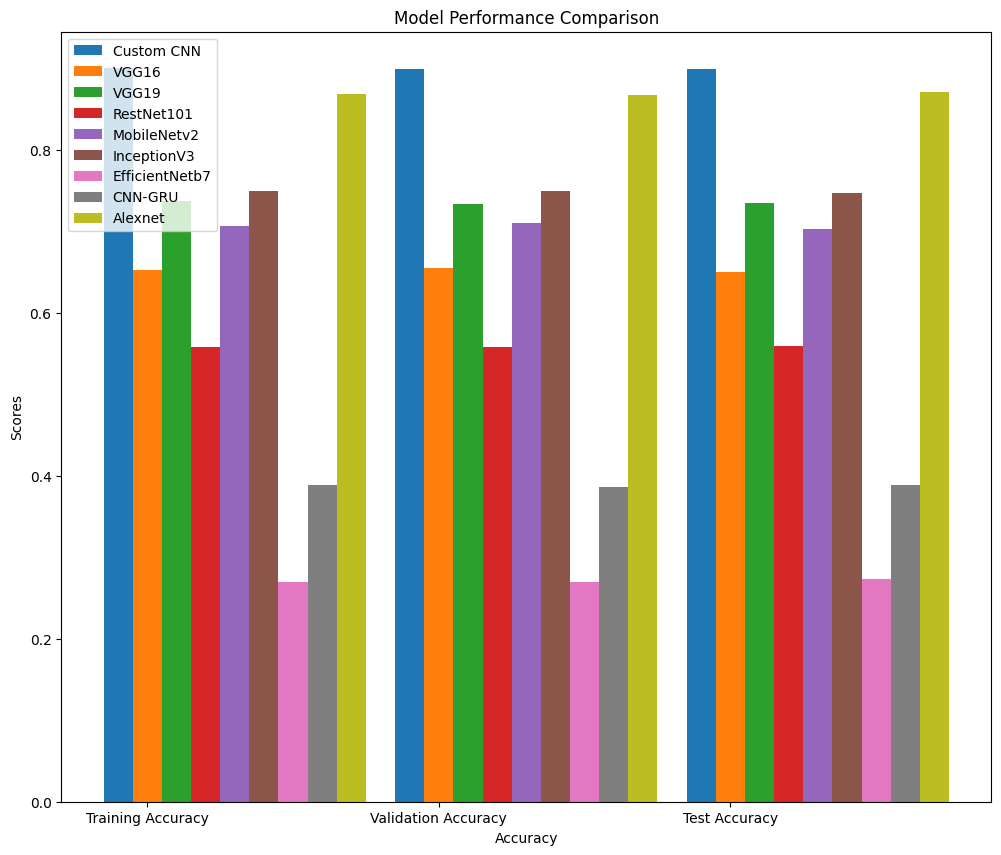

In [120]:
# Set figure size
plt.figure(figsize=(12, 10))

# Define bar width
bar_width = 0.1

# Set X-axis positions
x = np.arange(len(performance))

# Plot bars for each model
plt.bar(x, performance["Custom CNN"], width=bar_width, label="Custom CNN")
plt.bar(x + bar_width, performance['VGG16'], width=bar_width, label="VGG16")
plt.bar(x + 2 * bar_width, performance['VGG19'], width=bar_width, label="VGG19")
plt.bar(x + 3 * bar_width, performance['RestNet101'], width=bar_width, label="RestNet101")
plt.bar(x + 4 * bar_width,performance['Mobile Netv2'],width=bar_width,label = "MobileNetv2")
plt.bar(x + 5 * bar_width,performance['InceptionV3'],width=bar_width,label = "InceptionV3")
plt.bar(x + 6 * bar_width,performance['EfficientNetb7'],width=bar_width,label='EfficientNetb7')
plt.bar(x + 7 * bar_width,performance['CNN-GRU'],width=bar_width,label='CNN-GRU')
plt.bar(x + 8 * bar_width,performance['AlexNet'],width=bar_width,label='Alexnet')



# Labels & Title
plt.xlabel("Accuracy")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x + bar_width, performance['Accuracy_Scores'])  # Adjust X-ticks position
plt.legend(loc='upper left')  # Add legend

# Show plot
plt.show()

Based on the Performance we select Custom cnn

In [121]:
performance[['Accuracy_Scores','Custom CNN']]

,Accuracy_Scores,Custom CNN
0,Training Accuracy,0.900385
1,Validation Accuracy,0.899772
2,Test Accuracy,0.899160


## **Check with New Data**

In [122]:
import zipfile

with zipfile.ZipFile("new_data.zip", "r") as zip_ref:
    zip_ref.extractall("new_test_data")

In [123]:
new_test_data=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/new_test_data/new_data',
    shuffle = False,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 8
)

Found 8 files belonging to 4 classes.


In [124]:
actual_class_names = new_test_data.class_names
actual_class_names

['giloma', 'meningioma', 'notumor', 'pituitary']

In [125]:
new_test_data = new_test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [126]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


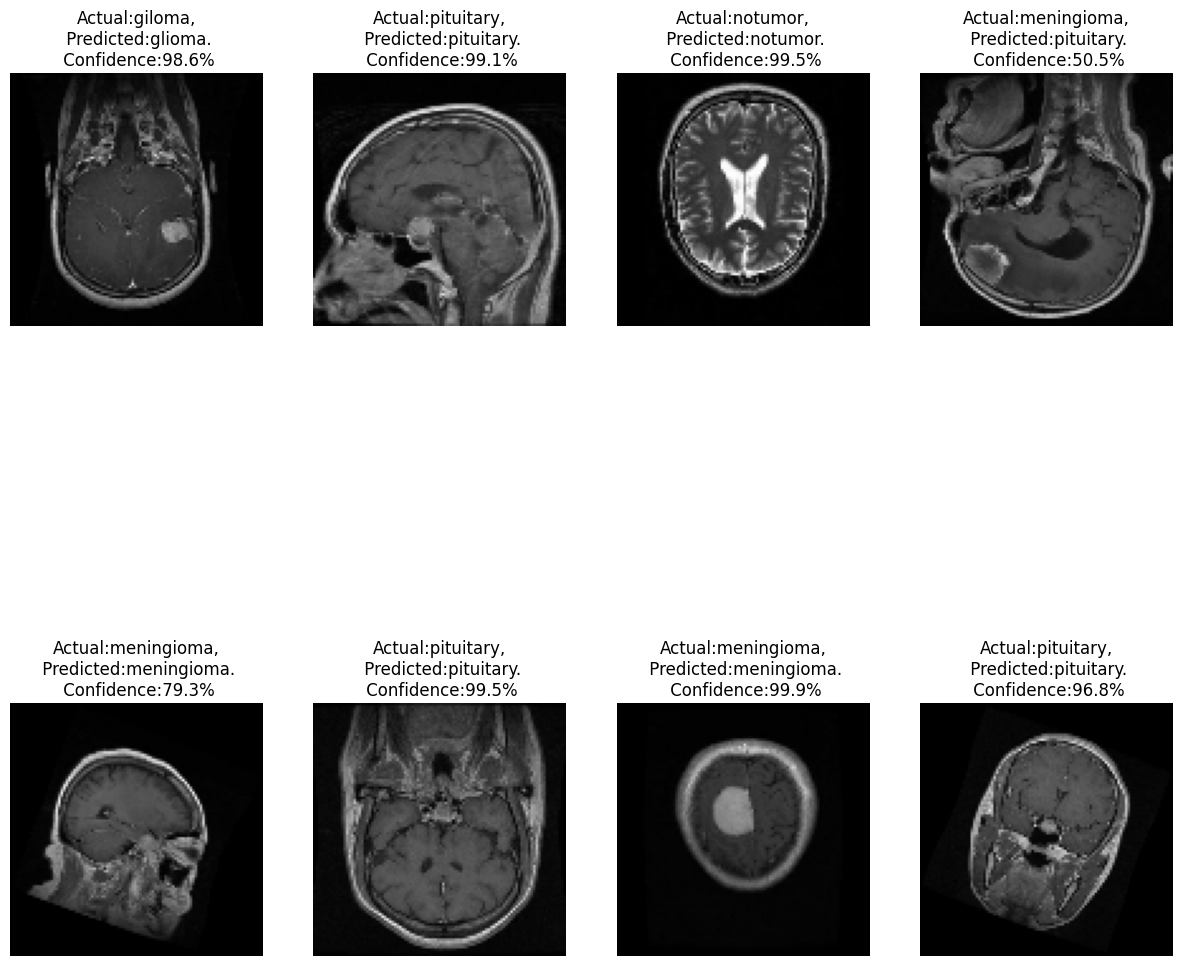

In [127]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(8):
    ax = plt.subplot(2,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class,confidence = predict(cnn_model,images[i].numpy().astype("uint8"))
    actual_class = actual_class_names[labels[i]]

    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence:.3}%")
    plt.axis("off")